Importing the necessary libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [3]:
choc = pd.read_csv('cleaned_chocolate.csv')

# One-hot encoding for categorical variables

In [4]:
# one hot encoding
choc_ohe = choc[['country_of_bean_origin',
                 'first_taste', 'second_taste', 'third_taste', 'fourth_taste']]
choc_ohe = pd.get_dummies(data = choc_ohe)

# extracting rest of the predictors
choc_num = choc[['cocoa_percent', 'counts_of_ingredients', 'number_of_taste',
                     'vanilla', 'lecithin', 'salt', 'sugar']]

# extracting response
choc_response = choc['rating_category']

# combining predictors and response
choc_ohe = pd.concat([choc_ohe, choc_response, choc_num], sort = False, axis = 1)
choc_ohe

,country_of_bean_origin_Australia,country_of_bean_origin_Belize,country_of_bean_origin_Blend,country_of_bean_origin_Bolivia,country_of_bean_origin_Bolvia,country_of_bean_origin_Brazil,country_of_bean_origin_Burma,country_of_bean_origin_Cameroon,country_of_bean_origin_Colombia,country_of_bean_origin_Congo,...,fourth_taste_wine,fourth_taste_woody,rating_category,cocoa_percent,counts_of_ingredients,number_of_taste,vanilla,lecithin,salt,sugar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,76.0,3,3,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,76.0,3,3,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,76.0,3,3,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,63.0,4,3,0,1,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,70.0,4,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,0,0,1,0,0,0,0,0,0,0,...,0,0,0,80.0,4,3,0,0,1,0
2220,0,0,0,0,0,0,0,0,1,0,...,0,0,1,75.0,3,2,0,0,0,1
2221,0,1,0,0,0,0,0,0,0,0,...,0,0,1,72.0,3,3,0,0,0,1
2222,0,0,0,0,0,0,0,0,0,1,...,0,0,1,70.0,3,3,0,0,0,1


For our models, we are going to use Stratified K Fold cross validation to evaluate the model, as well as calculating its accuracy rate on a training and testing data set

In [5]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

Extract response and predictor variables, and split train and test set

In [6]:
y1 = pd.DataFrame(choc_ohe['rating_category'])
X1 = pd.DataFrame(choc_ohe.drop('rating_category', axis = 1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, stratify = y1)

# Classification tree

We start off with a very simple model, a decision tree classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors

In [8]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

Using stratified K fold cross validation to evaluate the model

In [9]:
dectree = DecisionTreeClassifier(max_depth = 40) #Give good parameters
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_validate(dectree, X1, y1, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
#print(n_scores)
print('accuracy: %.3f (%.3f)' % (np.mean(n_scores["test_accuracy"]), np.std(n_scores["test_accuracy"])))
print('precison: %.3f (%.3f)' % (np.mean(n_scores["test_precision"]), np.std(n_scores["test_precision"])))
print('recall: %.3f (%.3f)' % (np.mean(n_scores["test_recall"]), np.std(n_scores["test_recall"])))
print('f1 score: %.3f (%.3f)' % (np.mean(n_scores["test_f1_score"]), np.std(n_scores["test_f1_score"])))

accuracy: 0.628 (0.022)
precison: 0.649 (0.019)
recall: 0.736 (0.036)
f1 score: 0.689 (0.020)


Test the model on a train and test data set

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9184935356942102

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6426966292134831

True '1' rate Train :	 0.991991991991992
True '0' rate Train :	 0.8243589743589743

False '1' rate Train :	 0.17564102564102563
False '0' rate Train :	 0.008008008008008008

True '1' rate Test :	 0.74
True '0' rate Test :	 0.517948717948718

False '1' rate Test :	 0.48205128205128206
False '0' rate Test :	 0.26



<AxesSubplot:>

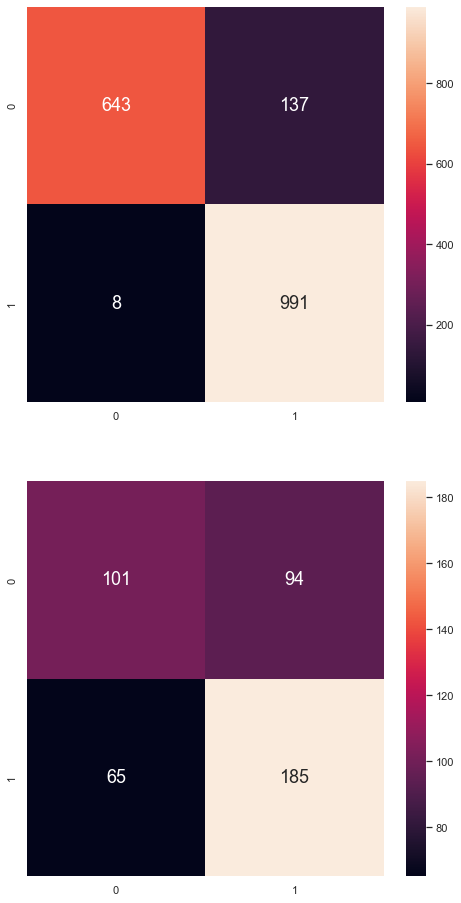

In [10]:
dectree.fit(X1_train, y1_train)                     # train the decision tree model

# Predict Response corresponding to Predictors
y1_train_pred = dectree.predict(X1_train)
y1_test_pred = dectree.predict(X1_test)

# Check the Goodness of Fit on Train Data
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X1_train, y1_train))
print()

# Check the Goodness of Fit on Test Data
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X1_test, y1_test))
print()

trainData = confusion_matrix(y1_train, y1_train_pred)
testData = confusion_matrix(y1_test, y1_test_pred)


print("True '1' rate Train :\t", (trainData[1][1]/(trainData[1][0]+trainData[1][1])))
print("True '0' rate Train :\t", (trainData[0][0]/(trainData[0][0]+trainData[0][1])))
print()

print("False '1' rate Train :\t", ((trainData[0][1])/((trainData[0][1]+trainData[0][0]))))
print("False '0' rate Train :\t", ((trainData[1][0])/((trainData[1][0]+trainData[1][1]))))
print()

print("True '1' rate Test :\t", (testData[1][1]/(testData[1][0]+testData[1][1])))
print("True '0' rate Test :\t", (testData[0][0]/(testData[0][0]+testData[0][1])))
print()

print("False '1' rate Test :\t", ((testData[0][1])/((testData[0][1]+testData[0][0]))))
print("False '0' rate Test :\t", ((testData[1][0])/((testData[1][0]+testData[1][1]))))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(8, 16))
sb.heatmap(trainData,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(testData, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Overall, the Classification Tree model did quite a bad job of predicting our chocolate rating, let's see how we can improve upon that accuracy.

# Random Forest

Importing the libraries

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Extract Response and Predictors
y = pd.DataFrame(choc_ohe['rating_category'])
X = pd.DataFrame(choc_ohe.drop('rating_category', axis = 1))

Using stratified K fold cross validation to evaluate the model

In [14]:
rforest = RandomForestClassifier(n_estimators = 800, max_depth = 80)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_validate(rforest, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
#print(n_scores)
print('accuracy: %.3f (%.3f)' % (np.mean(n_scores["test_accuracy"]), np.std(n_scores["test_accuracy"])))
print('precison: %.3f (%.3f)' % (np.mean(n_scores["test_precision"]), np.std(n_scores["test_precision"])))
print('recall: %.3f (%.3f)' % (np.mean(n_scores["test_recall"]), np.std(n_scores["test_recall"])))
print('f1 score: %.3f (%.3f)' % (np.mean(n_scores["test_f1_score"]), np.std(n_scores["test_f1_score"])))

accuracy: 0.682 (0.025)
precison: 0.678 (0.017)
recall: 0.828 (0.034)
f1 score: 0.745 (0.022)


Test the model on a train and test data set

Train Data
Accuracy  :	 0.9938167509836987

Test Data
Accuracy  :	 0.6943820224719102

True '1' rate Train :	 1.0
True '0' rate Train :	 0.985897435897436

False '1' rate Train :	 0.014102564102564103
False '0' rate Train :	 0.0

True '1' rate Test :	 0.788
True '0' rate Test :	 0.5743589743589743

False '1' rate Test :	 0.4256410256410256
False '0' rate Test :	 0.212



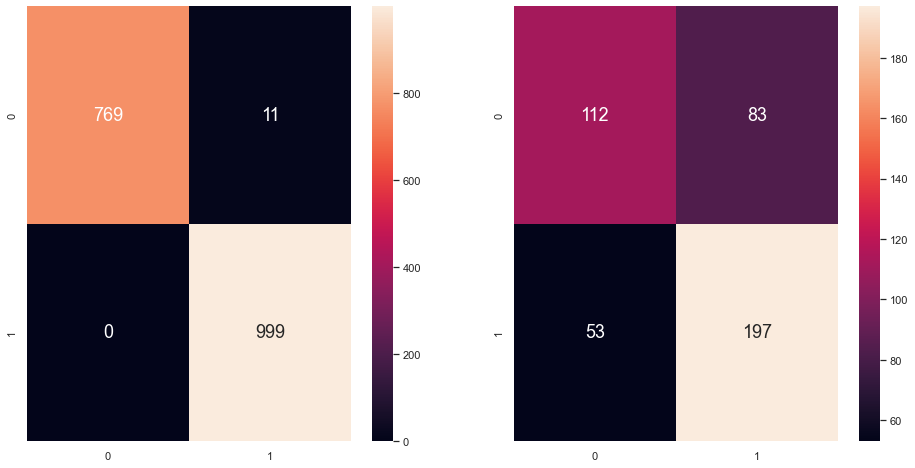

In [15]:
# Split the Dataset into Train and Test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit Random Forest on Train Data
rforest.fit(X1_train, y1_train.rating_category.ravel())

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X1_train, y1_train))
print()

print("Test Data")
print("Accuracy  :\t", rforest.score(X1_test, y1_test))
print()

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X1_train)
y_test_pred = rforest.predict(X1_test)

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y1_train, y_train_pred)
cmTest = confusion_matrix(y1_test, y_test_pred)

print("True '1' rate Train :\t", (cmTrain[1][1]/(cmTrain[1][0]+cmTrain[1][1])))
print("True '0' rate Train :\t", (cmTrain[0][0]/(cmTrain[0][0]+cmTrain[0][1])))
print()


print("False '1' rate Train :\t", ((cmTrain[0][1])/((cmTrain[0][1]+cmTrain[0][0]))))
print("False '0' rate Train :\t", ((cmTrain[1][0])/((cmTrain[1][0]+cmTrain[1][1]))))
print()


print("True '1' rate Test :\t", (cmTest[1][1]/(cmTest[1][0]+cmTest[1][1])))
print("True '0' rate Test :\t", (cmTest[0][0]/(cmTest[0][0]+cmTest[0][1])))
print()

print("False '1' rate Test :\t", ((cmTest[0][1])/((+cmTest[0][1]+cmTest[0][0]))))
print("False '0' rate Test :\t", ((cmTest[1][0])/((cmTest[1][0]+cmTest[1][1]))))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(16, 8))
sb.heatmap(cmTrain, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cmTest, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

We have good accuracy on the training data set, but horrible accuracy on the test dataset, this might be a case of overfitting.
We predict too much '0' value as '1', which can mess with our prediction of a highly rated chocolate bar

# Upsampling the minority classes

In [16]:
# See which category of rating is imbalanced
choc_ohe.rating_category.value_counts()

1    1249
0     975
Name: rating_category, dtype: int64

In [17]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [18]:
# Extract Response and Predictors
y = pd.DataFrame(choc_ohe['rating_category'])
X = pd.DataFrame(choc_ohe.drop('rating_category', axis = 1))

In [ ]:
cat_cols = [col for col in X.columns if col not in X.describe().columns]

In [29]:
rforest = RandomForestClassifier(n_estimators = 600, max_depth = 60)
over = ADASYN()
under = RandomUnderSampler(sampling_strategy=0.5) 
steps = [("smote", over),("model", rforest)]
pipeline = Pipeline(steps = steps)

Experimented with different kind of SMOTE algorithms, including SMOTE, SVMSMOTE, BorderlineSMOTE, KMeansSMOTE and ADASYN.
Found that ADASYN generally resulted in the best parameters

Using stratified K fold cross validation to evalute the model

In [30]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
print('accuracy: %.3f (%.3f)' % (np.mean(n_scores["test_accuracy"]), np.std(n_scores["test_accuracy"])))
print('precison: %.3f (%.3f)' % (np.mean(n_scores["test_precision"]), np.std(n_scores["test_precision"])))
print('recall: %.3f (%.3f)' % (np.mean(n_scores["test_recall"]), np.std(n_scores["test_recall"])))
print('f1 score: %.3f (%.3f)' % (np.mean(n_scores["test_f1_score"]), np.std(n_scores["test_f1_score"])))

accuracy: 0.688 (0.024)
precison: 0.695 (0.017)
recall: 0.791 (0.033)
f1 score: 0.740 (0.022)


Test the model on a train and test data set

In [21]:
y1_train.value_counts()

rating_category
1                  999
0                  780
dtype: int64

In [22]:
X1_train_res, y1_train_res = over.fit_resample(X1_train, y1_train)
y1_train_res.value_counts()

rating_category
1                  999
0                  835
dtype: int64

Train Data
Accuracy  :	 0.9634678298800436

Test Data
Accuracy  :	 0.6943820224719102

True '1' rate Train :	 1.0
True '0' rate Train :	 0.9197604790419162

False '1' rate Train :	 0.08023952095808383
False '0' rate Train :	 0.0

True '1' rate Test :	 0.764
True '0' rate Test :	 0.6051282051282051

False '1' rate Test :	 0.39487179487179486
False '0' rate Test :	 0.236



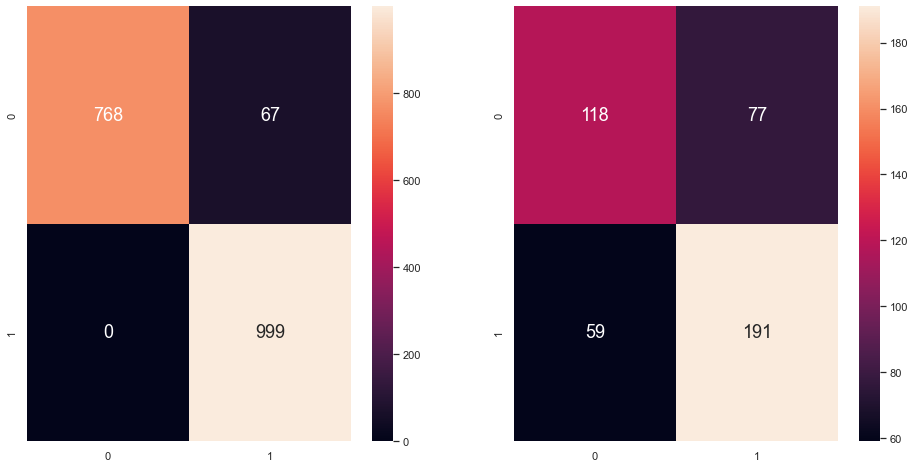

In [31]:
# Split the Dataset into Train and Test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit Random Forest on Train Data
rforest.fit(X1_train_res, y1_train_res.rating_category.ravel())

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X1_train_res, y1_train_res))
print()
print("Test Data")
print("Accuracy  :\t", rforest.score(X1_test, y1_test))
print()

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X1_train_res)
y_test_pred = rforest.predict(X1_test)

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y1_train_res, y_train_pred)
cmTest = confusion_matrix(y1_test, y_test_pred)

print("True '1' rate Train :\t", (cmTrain[1][1]/(cmTrain[1][0]+cmTrain[1][1])))
print("True '0' rate Train :\t", (cmTrain[0][0]/(cmTrain[0][0]+cmTrain[0][1])))
print()

print("False '1' rate Train :\t", ((cmTrain[0][1])/((cmTrain[0][1]+cmTrain[0][0]))))
print("False '0' rate Train :\t", ((cmTrain[1][0])/((cmTrain[1][0]+cmTrain[1][1]))))
print()

print("True '1' rate Test :\t", (cmTest[1][1]/(cmTest[1][0]+cmTest[1][1])))
print("True '0' rate Test :\t", (cmTest[0][0]/(cmTest[0][0]+cmTest[0][1])))
print()

print("False '1' rate Test :\t", ((cmTest[0][1])/((cmTest[0][1]+cmTest[0][0]))))
print("False '0' rate Test :\t", ((cmTest[1][0])/((cmTest[1][0]+cmTest[1][1]))))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(16, 8))
sb.heatmap(cmTrain, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cmTest, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

Better accuracy, and better recall rate as well

# Removing minority classes

In [36]:
beanOriginCounts = pd.DataFrame(choc['country_of_bean_origin'].value_counts())
beanOriginTop = beanOriginCounts[beanOriginCounts['country_of_bean_origin'] > 40].reset_index()
beanOriginTop

,index,country_of_bean_origin
0,Venezuela,238
1,Peru,207
2,Dominican republic,200
3,Ecuador,194
4,Madagascar,157
5,Blend,140
6,Nicaragua,92
7,Brazil,74
8,Bolivia,71
9,Belize,65


In the columns "country_of_bean_origin", there are a lot of data which only appeared less than 1%.

In [41]:
choc_xoutlier = choc[choc["country_of_bean_origin"].isin(beanOriginTop["index"])]
choc["rating_category"].value_counts()

1    1249
0     975
Name: rating_category, dtype: int64

In [38]:
# one hot encoding
choc_xoutlier_ohe = choc_xoutlier[['country_of_bean_origin',
                                   'first_taste', 'second_taste', 'third_taste', 'fourth_taste']]
choc_xoutlier_ohe = pd.get_dummies(data = choc_xoutlier_ohe)

# extracting rest of the predictors
choc_xoutlier_num = choc_xoutlier[['cocoa_percent', 'counts_of_ingredients', 'number_of_taste'
                                   , 'vanilla', 'lecithin', 'salt', 'sugar']]

# extracting response
choc_xoutlier_response = choc_xoutlier['rating_category']

#combining predictors and response
choc_xoutlier_ohe = pd.concat([choc_xoutlier_ohe, choc_xoutlier_response, choc_xoutlier_num], sort = False, axis = 1)
choc_xoutlier_ohe

,country_of_bean_origin_Belize,country_of_bean_origin_Blend,country_of_bean_origin_Bolivia,country_of_bean_origin_Brazil,country_of_bean_origin_Colombia,country_of_bean_origin_Costa rica,country_of_bean_origin_Dominican republic,country_of_bean_origin_Ecuador,country_of_bean_origin_Guatemala,country_of_bean_origin_Madagascar,...,fourth_taste_wine,fourth_taste_woody,rating_category,cocoa_percent,counts_of_ingredients,number_of_taste,vanilla,lecithin,salt,sugar
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,76.0,3,3,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,76.0,3,3,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,76.0,3,3,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,63.0,4,3,0,1,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,70.0,4,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,75.0,4,2,0,0,1,0
2219,0,1,0,0,0,0,0,0,0,0,...,0,0,0,80.0,4,3,0,0,1,0
2220,0,0,0,0,1,0,0,0,0,0,...,0,0,1,75.0,3,2,0,0,0,1
2221,1,0,0,0,0,0,0,0,0,0,...,0,0,1,72.0,3,3,0,0,0,1


In [39]:
choc_xoutlier_ohe.rating_category.value_counts()

1    1039
0     779
Name: rating_category, dtype: int64

In [42]:
# Extract Response and Predictors
y = pd.DataFrame(choc_xoutlier_ohe['rating_category'])
X = pd.DataFrame(choc_xoutlier_ohe.drop('rating_category', axis = 1))

In [50]:
rforest = RandomForestClassifier(n_estimators = 400, max_depth = 60)
over = ADASYN()
under = RandomUnderSampler(sampling_strategy=0.5) 
steps = [("smote", over),("model", rforest)]
pipeline = Pipeline(steps = steps)

Using stratified K fold cross validation to evalute the model

In [51]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
print('accuracy: %.3f (%.3f)' % (np.mean(n_scores["test_accuracy"]), np.std(n_scores["test_accuracy"])))
print('precison: %.3f (%.3f)' % (np.mean(n_scores["test_precision"]), np.std(n_scores["test_precision"])))
print('recall: %.3f (%.3f)' % (np.mean(n_scores["test_recall"]), np.std(n_scores["test_recall"])))
print('f1 score: %.3f (%.3f)' % (np.mean(n_scores["test_f1_score"]), np.std(n_scores["test_f1_score"])))

accuracy: 0.655 (0.030)
precison: 0.748 (0.025)
recall: 0.597 (0.066)
f1 score: 0.662 (0.039)


Test the model on a train and test data set

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train_res, y_train_res = over.fit_resample(X_train, y_train)
y_train_res.value_counts()

rating_category
1                  841
0                  780
dtype: int64

Test the model on a train and test data set

Train Data
Accuracy  :	 0.9969154842689698

Test Data
Accuracy  :	 0.6785714285714286

True '1' rate Train :	 0.9988109393579072
True '0' rate Train :	 0.9948717948717949

False '1' rate Train :	 0.005128205128205128
False '0' rate Train :	 0.0011890606420927466

True '1' rate Test :	 0.5909090909090909
True '0' rate Test :	 0.7831325301204819

False '1' rate Test :	 0.21686746987951808
False '0' rate Test :	 0.4090909090909091



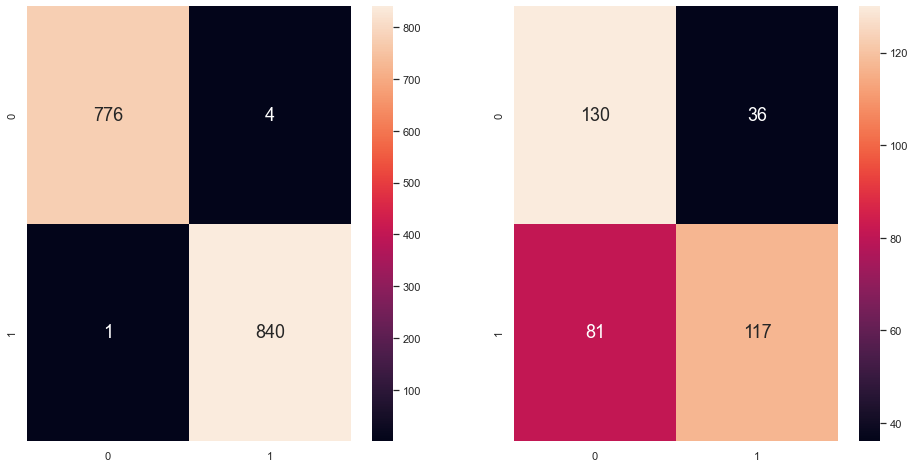

In [53]:
# Split the Dataset into Train and Test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit Random Forest on Train Data
rforest.fit(X_train_res, y_train_res.rating_category.ravel())

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train_res, y_train_res))
print()
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train_res)
y_test_pred = rforest.predict(X_test)

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train_res, y_train_pred)
cmTest = confusion_matrix(y_test, y_test_pred)

print("True '1' rate Train :\t", (cmTrain[1][1]/(cmTrain[1][0]+cmTrain[1][1])))
print("True '0' rate Train :\t", (cmTrain[0][0]/(cmTrain[0][0]+cmTrain[0][1])))
print()

print("False '1' rate Train :\t", ((cmTrain[0][1])/((cmTrain[0][1]+cmTrain[0][0]))))
print("False '0' rate Train :\t", ((cmTrain[1][0])/((cmTrain[1][0]+cmTrain[1][1]))))
print()


print("True '1' rate Test :\t", (cmTest[1][1]/(cmTest[1][0]+cmTest[1][1])))
print("True '0' rate Test :\t", (cmTest[0][0]/(cmTest[0][0]+cmTest[0][1])))
print()

print("False '1' rate Test :\t", ((cmTest[0][1])/((cmTest[0][1]+cmTest[0][0]))))
print("False '0' rate Test :\t", ((cmTest[1][0])/((cmTest[1][0]+cmTest[1][1]))))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(16, 8))
sb.heatmap(cmTrain, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cmTest, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

To add comment here

# Gradient Boosting

Let's try a more sophisticated model, Gradient Boosting Machine

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
# gradient boosting for classification in scikit-learn

In [58]:
y = pd.DataFrame(choc_xoutlier_ohe['rating_category'])
X = pd.DataFrame(choc_xoutlier_ohe.drop('rating_category', axis = 1))

In [62]:
GradBoost = GradientBoostingClassifier(loss = "deviance", learning_rate = 0.1, n_estimators = 500, subsample = 0.5, max_depth = 6)
over = ADASYN()
under = RandomUnderSampler(sampling_strategy=0.5) 
steps = [("smote", over),("model", GradBoost)]
pipeline = Pipeline(steps = steps)

Using stratified K fold cross validation to evalute the model

In [63]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
print('accuracy: %.3f (%.3f)' % (np.mean(n_scores["test_accuracy"]), np.std(n_scores["test_accuracy"])))
print('precison: %.3f (%.3f)' % (np.mean(n_scores["test_precision"]), np.std(n_scores["test_precision"])))
print('recall: %.3f (%.3f)' % (np.mean(n_scores["test_recall"]), np.std(n_scores["test_recall"])))
print('f1 score: %.3f (%.3f)' % (np.mean(n_scores["test_f1_score"]), np.std(n_scores["test_f1_score"])))

accuracy: 0.670 (0.021)
precison: 0.714 (0.018)
recall: 0.705 (0.028)
f1 score: 0.709 (0.020)


Test the model on a train and test data set

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train_res, y_train_res = over.fit_resample(X_train, y_train)
y_train_res.value_counts()

rating_category
1                  843
0                  777
dtype: int64

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Data
Accuracy  :	 0.9919753086419754

Test Data
Accuracy  :	 0.695054945054945

True '1' rate Train :	 1.0
True '0' rate Train :	 0.9832689832689833

False '1' rate Train :	 0.01673101673101673
False '0' rate Train :	 0.0

True '1' rate Test :	 0.7244897959183674
True '0' rate Test :	 0.6607142857142857

False '1' rate Test :	 0.3392857142857143
False '0' rate Test :	 0.2755102040816326



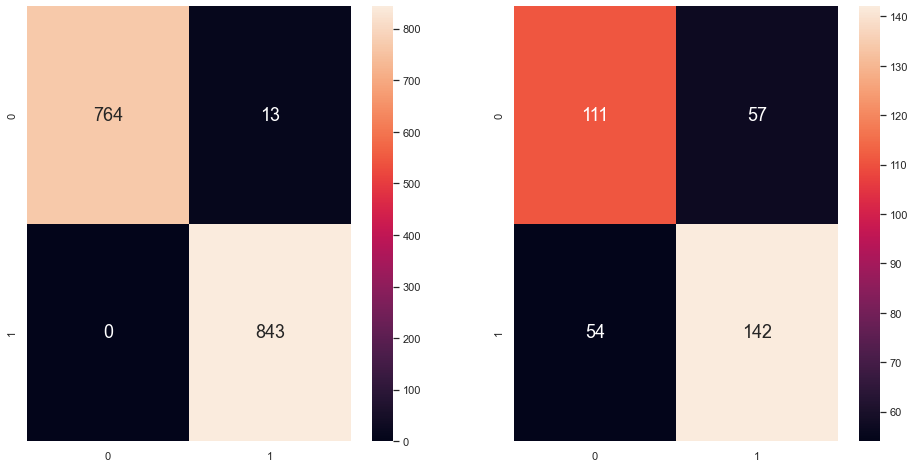

In [65]:
GradBoost.fit(X_train_res, y_train_res)
print("Train Data")
print("Accuracy  :\t", GradBoost.score(X_train_res, y_train_res))
print()
print("Test Data")
print("Accuracy  :\t", GradBoost.score(X_test, y_test))
print()
y_train_pred = GradBoost.predict(X_train_res)
y_test_pred = GradBoost.predict(X_test)

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train_res, y_train_pred)
cmTest = confusion_matrix(y_test, y_test_pred)

print("True '1' rate Train :\t", (cmTrain[1][1]/(cmTrain[1][0]+cmTrain[1][1])))
print("True '0' rate Train :\t", (cmTrain[0][0]/(cmTrain[0][0]+cmTrain[0][1])))
print()

print("False '1' rate Train :\t", ((cmTrain[0][1])/((cmTrain[0][1]+cmTrain[0][0]))))
print("False '0' rate Train :\t", ((cmTrain[1][0])/((cmTrain[1][0]+cmTrain[1][1]))))
print()

print("True '1' rate Test :\t", (cmTest[1][1]/(cmTest[1][0]+cmTest[1][1])))
print("True '0' rate Test :\t", (cmTest[0][0]/(cmTest[0][0]+cmTest[0][1])))
print()

print("False '1' rate Test :\t", ((cmTest[0][1])/((cmTest[0][1]+cmTest[0][0]))))
print("False '0' rate Test :\t", ((cmTest[1][0])/((cmTest[1][0]+cmTest[1][1]))))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(16, 8))
sb.heatmap(cmTrain, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cmTest, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

## Without removing outliers

In [86]:
GradBoost = GradientBoostingClassifier(loss = "deviance", learning_rate = 0.08, n_estimators = 700, subsample = 0.8, max_depth = 9)
over = ADASYN()
under = RandomUnderSampler(sampling_strategy=0.5) 
steps = [("smote", over),("model", GradBoost)]
pipeline = Pipeline(steps = steps)

In [87]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_validate(pipeline, X1, y1, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
print('accuracy: %.3f (%.3f)' % (np.mean(n_scores["test_accuracy"]), np.std(n_scores["test_accuracy"])))
print('precison: %.3f (%.3f)' % (np.mean(n_scores["test_precision"]), np.std(n_scores["test_precision"])))
print('recall: %.3f (%.3f)' % (np.mean(n_scores["test_recall"]), np.std(n_scores["test_recall"])))
print('f1 score: %.3f (%.3f)' % (np.mean(n_scores["test_f1_score"]), np.std(n_scores["test_f1_score"])))

accuracy: 0.686 (0.020)
precison: 0.714 (0.020)
recall: 0.737 (0.029)
f1 score: 0.725 (0.019)


In [75]:
X1_train_res, y1_train_res = over.fit_resample(X1_train, y1_train)
y1_train_res.value_counts()

rating_category
1                  999
0                  835
dtype: int64

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Data
Accuracy  :	 0.9923664122137404

Test Data
Accuracy  :	 0.6898876404494382

True '1' rate Train :	 1.0
True '0' rate Train :	 0.9832335329341317

False '1' rate Train :	 0.016766467065868262
False '0' rate Train :	 0.0

True '1' rate Test :	 0.692
True '0' rate Test :	 0.6871794871794872

False '1' rate Test :	 0.3128205128205128
False '0' rate Test :	 0.308



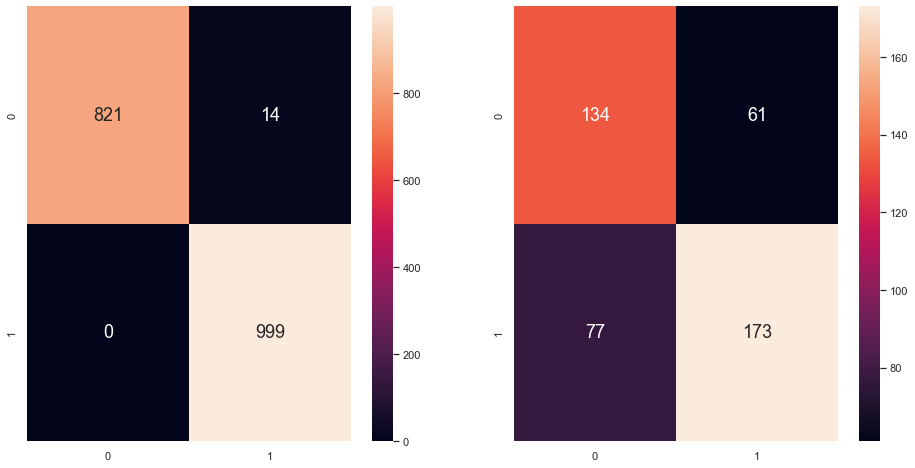

In [89]:
GradBoost.fit(X1_train_res, y1_train_res)
print("Train Data")
print("Accuracy  :\t", GradBoost.score(X1_train_res, y1_train_res))
print()
print("Test Data")
print("Accuracy  :\t", GradBoost.score(X1_test, y1_test))
print()
y_train_pred = GradBoost.predict(X1_train_res)
y_test_pred = GradBoost.predict(X1_test)

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y1_train_res, y_train_pred)
cmTest = confusion_matrix(y1_test, y_test_pred)

print("True '1' rate Train :\t", (cmTrain[1][1]/(cmTrain[1][0]+cmTrain[1][1])))
print("True '0' rate Train :\t", (cmTrain[0][0]/(cmTrain[0][0]+cmTrain[0][1])))
print()

print("False '1' rate Train :\t", ((cmTrain[0][1])/((cmTrain[0][1]+cmTrain[0][0]))))
print("False '0' rate Train :\t", ((cmTrain[1][0])/((cmTrain[1][0]+cmTrain[1][1]))))
print()

print("True '1' rate Test :\t", (cmTest[1][1]/(cmTest[1][0]+cmTest[1][1])))
print("True '0' rate Test :\t", (cmTest[0][0]/(cmTest[0][0]+cmTest[0][1])))
print()

print("False '1' rate Test :\t", ((cmTest[0][1])/((cmTest[0][1]+cmTest[0][0]))))
print("False '0' rate Test :\t", ((cmTest[1][0])/((cmTest[1][0]+cmTest[1][1]))))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(16, 8))
sb.heatmap(cmTrain, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cmTest, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()